In [2]:
#import packages to be used
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_excel('Online Retail.xlsx')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [12]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
#print the shape of the dataframe
df.shape

In [ ]:
#handle missing data
df.isnull().sum()

In [ ]:
#since we have sufficient data, 
#we drop all the rows with missing values
df.dropna(inplace=True)

In [ ]:
#convert the stock code column into str
df['StockCode']=df['StockCode'].astype(str)

In [ ]:
#check out the number of unique customers in our dataset
customers = df["CustomerID"].unique().tolist()
len(customers)

In [ ]:
# shuffle customer ID's
random.shuffle(customers)

# extract 90% of customer ID's
customers_train = [customers[i] for i in range(round(0.9*len(customers)))]

# split data into train and validation set
train_df = df[df['CustomerID'].isin(customers_train)]
validation_df = df[~df['CustomerID'].isin(customers_train)]

In [ ]:
len(customers_train)

In [ ]:
# list to capture purchase history of the customers
purchases_train = []

# populate the list with the product codes
for i in tqdm(customers_train): #for training set
    temp = train_df[train_df["CustomerID"] == i]["StockCode"].tolist()
    purchases_train.append(temp)

In [ ]:
# list to capture purchase history of the customers
purchases_val = []

# populate the list with the product codes
for i in tqdm(validation_df['CustomerID'].unique()): #for validation set
    temp = validation_df[validation_df["CustomerID"] == i]["StockCode"].tolist()
    purchases_val.append(temp)

In [ ]:
#building word to vector for the product
# train word2vec model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(purchases_train, progress_per=200)

model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=100, report_delay=1)

In [ ]:
from gensim.models import Word2Vec
#model.save("product_rec.model")

#model = Word2Vec.load("word2vec.model") #using this to load the model

In [ ]:
#use this if you dont plan on training the model any further
model.init_sims(replace=True)

In [ ]:
print(model)

In [ ]:
# extract all vectors
X = model[model.wv.vocab]

X.shape

In [ ]:
#We are going to reduce the dimensions of the product embeddings from 100 to 2 by using the UMAP algorithm.
#It is popularly used for dimensionality reduction.
import umap

cluster_embedding = umap.UMAP(n_neighbors=40, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [ ]:
#create a product-ID and product-description dictionary to easily map a product’s description to its ID and vice versa.
#suggest similar products for a certain product or a product’s vector.
products = train_df[["StockCode", "Description"]]

# remove duplicates
products.drop_duplicates(inplace=True, subset='StockCode', keep="last")

# create product-ID and product-description dictionary
products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

In [ ]:
# test the dictionary
products_dict['22310']#84029G , 84029E

In [ ]:
#defined the function below. It will take a product’s vector (n) as input and return top 6 similar products
def similar_products(v, n = 10):
    
    # extract most similar products for the input vector
    ms = model.similar_by_vector(v, topn= n+1)[1:]
    
    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        pair = (products_dict[j[0]][0], j[1])
        new_ms.append(pair)
        
    return new_ms        

In [ ]:

#testing of the function based on the vector of a single product only
similar_products(model['84029G']) #84029G , 90019A

In [ ]:
#recommend products based on the multiple purchases he or she has made in the past
#One simple solution is to take the average of all the vectors of the products the user has bought so far and use this resultant vector to find similar products.
#We will use the function below that takes in a list of product IDs and gives out a 100-dimensional vector which is a mean of vectors of the products in the input list:
def aggregate_vectors(products):
    product_vec = []
    for i in products:
        try:
            product_vec.append(model[i])
        except KeyError:
            continue
        
    return np.mean(product_vec, axis=0)

In [ ]:
#list of purchase sequence
len(purchases_val[1])

In [ ]:
gensim.m

In [ ]:
#pass the list inot the aggregate vector function
aggregate_vectors(purchases_val[1]).shape

In [ ]:
# this would recommend products based from the user purchase history
#Now we can use this result to get the most similar products:
similar_products(aggregate_vectors(purchases_val[1]))

In [ ]:
#use this fucntion below to give you recommendation based on the user last 10 product purchase
similar_products(aggregate_vectors(purchases_val[1][-10:]))

In [1]:
#link database server to python
import mysql.connector

In [2]:
# Creating connection object
mydb = mysql.connector.connect(
    host = "54.74.218.221",
    user = "vieunite",
    password = "Allsee2022!",
    database = "vieunite"
)
 
# Printing the connection object
print(mydb)

In [3]:
#show database

cursor=mydb.cursor()
cursor.execute("SHOW TABLES")

In [4]:
for x in cursor:
    print(x)

('QRTZ_BLOB_TRIGGERS',)
('QRTZ_CALENDARS',)
('QRTZ_CRON_TRIGGERS',)
('QRTZ_FIRED_TRIGGERS',)
('QRTZ_JOB_DETAILS',)
('QRTZ_LOCKS',)
('QRTZ_PAUSED_TRIGGER_GRPS',)
('QRTZ_SCHEDULER_STATE',)
('QRTZ_SIMPLE_TRIGGERS',)
('QRTZ_SIMPROP_TRIGGERS',)
('QRTZ_TRIGGERS',)
('pframe_agreement',)
('pframe_album',)
('pframe_announcement',)
('pframe_announcement_send',)
('pframe_artist',)
('pframe_artist_view',)
('pframe_artwork',)
('pframe_artwork_album',)
('pframe_artwork_album_view',)
('pframe_artwork_category',)
('pframe_artwork_comment',)
('pframe_artwork_comment_thumbs_up',)
('pframe_artwork_like',)
('pframe_artwork_like_view',)
('pframe_artwork_mark',)
('pframe_artwork_posts',)
('pframe_artwork_posts_view',)
('pframe_artwork_report',)
('pframe_artwork_report_pic',)
('pframe_artwork_share',)
('pframe_artwork_share_view',)
('pframe_artwork_thumbs_up',)
('pframe_artwork_thumbs_up_view',)
('pframe_artwork_wish',)
('pframe_background',)
('pframe_city_freight',)
('pframe_country',)
('pframe_currency',)


In [6]:
import pyodbc
import pandas as pd
# select 26 rows from SQL table to insert in dataframe.
query = "SELECT * FROM pframe_order_goods_view;"
df = pd.read_sql(query, mydb)
#print(df.head())
daf=pd.DataFrame(df)

In [7]:
#daf

In [68]:
#print the shape of the dataframe
daf.shape

(129, 23)

In [69]:
daf_basket= daf[['order_no','order_goods_id','goods_name','amount']]
daf_basket.head(10)

,order_no,order_goods_id,goods_name,amount
0,2022030710593423665487,1500667451410595841,2021-12-22测试添加艺术皮,1.0
1,2022030709494389518203,1500649877092286466,2021-12-22测试添加艺术皮,1.0
2,2022030515464353543449,1500014936474075138,测试相框1,10.0
3,2022030515460795449267,1500014790067699713,测试相框1,10.0
4,20211115451233121,14632217321312232311,测试相框1,10000.0
5,20211115451233335,14632217321312232324,山水之间,2000.0
6,20211115451233335,14632217321312232352,云淡风轻,2000.0
7,2021122718305033279333,1475413866842271746,测试艺术品4,15.0
8,2021122717443104160026,1475402209915150338,测试艺术品111,100.0
9,2021122717440530349258,1475402099382657025,测试相框1,10.0


In [70]:
#examine the most popular product
daf.groupby('goods_name').agg(orders=('order_no','nunique'),
                                     quantity=('amount','sum')).sort_values(by='orders',ascending=False).head()

,orders,quantity
goods_name,,
测试艺术品3,30,152.0
测试相框1,29,10370.0
测试艺术品2,19,180.0
测试艺术品4,11,135.0
测试艺术品111,10,900.0


In [71]:
#creating a matrix for the all the items
daf_items=daf_basket.pivot_table(index='order_no', columns=['goods_name'],values='amount').fillna(0)
daf_items.head()

goods_name,11111,2021-12-22测试添加艺术皮,云淡风轻,山水之间,树叶78,测试相框1,测试相框2,测试相框3,测试相框4,测试艺术品10(免费),测试艺术品111,测试艺术品2,测试艺术品3,测试艺术品4,测试艺术品7,测试艺术品8,测试艺术品9,🌹
order_no,,,,,,,,,,,,,,,,,,
20211115451233121,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20211115451233335,0.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021121310042953325164,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021121311035423118393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021121311214162597024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
def get_recommendations(daf, item):
    recommendations =daf.corrwith(daf[item])
    recommendations.dropna(inplace=True)
    recommendations = pd.DataFrame(recommendations, columns=['order_no']).reset_index()
    recommendations = recommendations.sort_values(by='order_no', ascending=False)
    return recommendations

In [76]:
recommendations = get_recommendations(daf_items, '测试相框2')
recommendations.head(10)
#get_recommendations(daf_items, '测试相框2')

,goods_name,order_no
5,测试相框2,1.000000
7,测试相框4,-0.019342
1,云淡风轻,-0.019342
2,山水之间,-0.019342
3,树叶78,-0.019342
4,测试相框1,-0.020065
0,2021-12-22测试添加艺术皮,-0.027493
14,测试艺术品9,-0.027493
15,🌹,-0.027493
6,测试相框3,-0.033845


In [8]:
#FOR COLOR RECOMMENDATION
# select 26 rows from SQL table to insert in dataframe.
query = "SELECT * FROM pframe_artwork;"
d_f1 = pd.read_sql(query, mydb)
#print(df.head())
d_f=pd.DataFrame(d_f1)

In [10]:
len(d_f)

44

In [16]:
d_f.head(5)

,id,user_id,artist_id,artwork_category_id,type,name,pic_url,cost_price,price,stock,...,comment_total,status,reason,updown_status,pic_width,pic_height,mark_id,power_type,resource_type,user_store_id
0,1,None,None,None,NaN,None,None,NaN,0.0,0,...,0,1,None,1,NaN,NaN,None,1,1,0
1,1462707316176084993,1465119861546815490,13a2137ad1281237asdasd,dd12137ad1281237ayte12aj,1.0,黄昏过后,http://www.baidu.com,1000.0,3000.0,0,...,0,1,None,2,33.0,66.0,1481495214803804161,1,1,0
2,1463699575814115329,1465119861546815490,None,None,2.0,客厅巨幅相框,http://8.217.65.110:8082/photoframe-mobile/sys...,NaN,10000.0,100000,...,0,1,None,1,33.0,66.0,91decac68377427281b8df237501add,1,1,0
3,1464064526610489345,1463036805796450305,1464062799417159682,1464096191122710530,1.0,测试艺术品111,http://8.217.65.110:8082/photoframe-mobile/sys...,100.0,100.0,99,...,8,1,,1,939.0,1000.0,1481495214803804161,1,1,2
4,1464073500332376066,1463036805796450305,1464062799417159682,1464096191122710530,1.0,测试艺术品2,http://8.217.65.110:8082/photoframe-mobile/sys...,10.0,10.0,99,...,3,1,,1,1024.0,802.0,1481495214803804161,1,1,0


In [15]:
d_f.to_json(r'rating_artwork.json')

In [12]:
d_f.to_csv('rating_artwork.csv', encoding='utf-8')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications


#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dropout, Flatten, Dense
#from keras import applications
#from tensorflow.keras import applications
#from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.metrics import pairwise_distances
import requests

Using TensorFlow backend.


In [2]:
from PIL import Image
import pickle
from datetime import datetime
from PIL import ImageFile

In [3]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
#import streamlit as st
#use the below library while displaying the images in jupyter notebook
from IPython.display import display, Image
fashion_data = pd.read_csv("C:/Users/CON3ADOLEA/Downloads/GNN-RecSys-main/recommenders-main/data/fashion.csv")

In [4]:
fashion_data = pd.DataFrame(fashion_data)

In [5]:
fashion_data #dataframe of the fashion dataset

,ProductId,Gender,Category,SubCategory,ProductType,Colour,Usage,ProductTitle,Image,ImageURL
0,42419,Girls,Apparel,Topwear,Tops,White,Casual,Gini and Jony Girls Knit White Top,42419.jpg,http://assets.myntassets.com/v1/images/style/p...
1,34009,Girls,Apparel,Topwear,Tops,Black,Casual,Gini and Jony Girls Black Top,34009.jpg,http://assets.myntassets.com/v1/images/style/p...
2,40143,Girls,Apparel,Topwear,Tops,Blue,Casual,Gini and Jony Girls Pretty Blossom Blue Top,40143.jpg,http://assets.myntassets.com/v1/images/style/p...
3,23623,Girls,Apparel,Topwear,Tops,Pink,Casual,Doodle Kids Girls Pink I love Shopping Top,23623.jpg,http://assets.myntassets.com/v1/images/style/p...
4,47154,Girls,Apparel,Bottomwear,Capris,Black,Casual,Gini and Jony Girls Black Capris,47154.jpg,http://assets.myntassets.com/v1/images/style/p...
...,...,...,...,...,...,...,...,...,...,...
2901,51755,Women,Footwear,Shoes,Casual Shoes,Black,Casual,Catwalk Women Black Shoes,51755.jpg,http://assets.myntassets.com/v1/images/style/p...
2902,47630,Women,Footwear,Shoes,Flats,Blue,Casual,Carlton London Women Blue Shoes,47630.jpg,http://assets.myntassets.com/v1/images/style/p...
2903,32836,Women,Footwear,Shoes,Flats,Pink,Casual,Grendha Women Flori Pink Sandals,32836.jpg,http://assets.myntassets.com/v1/images/style/p...
2904,35821,Women,Footwear,Shoes,Heels,Black,Casual,Enroute Women Black Heels,35821.jpg,http://assets.myntassets.com/v1/images/style/p...


In [6]:
print("Total number of products : ", fashion_data.shape[0])
print("Total number of unique subcategories : ", fashion_data["SubCategory"].nunique())
print("Total number of unique gender types : ", fashion_data["Gender"].nunique())

Total number of products :  2906
Total number of unique subcategories :  9
Total number of unique gender types :  4


In [7]:
#fashion_data["Colour"].value_counts() #show the content of the count of the total colour column
fashion_data["Gender"].value_counts()

Men      811
Women    769
Boys     759
Girls    567
Name: Gender, dtype: int64

In [8]:
import seaborn as sns

C:\Users\CON3ADOLEA\.conda\envs\colour_recommendation\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Count of Items')

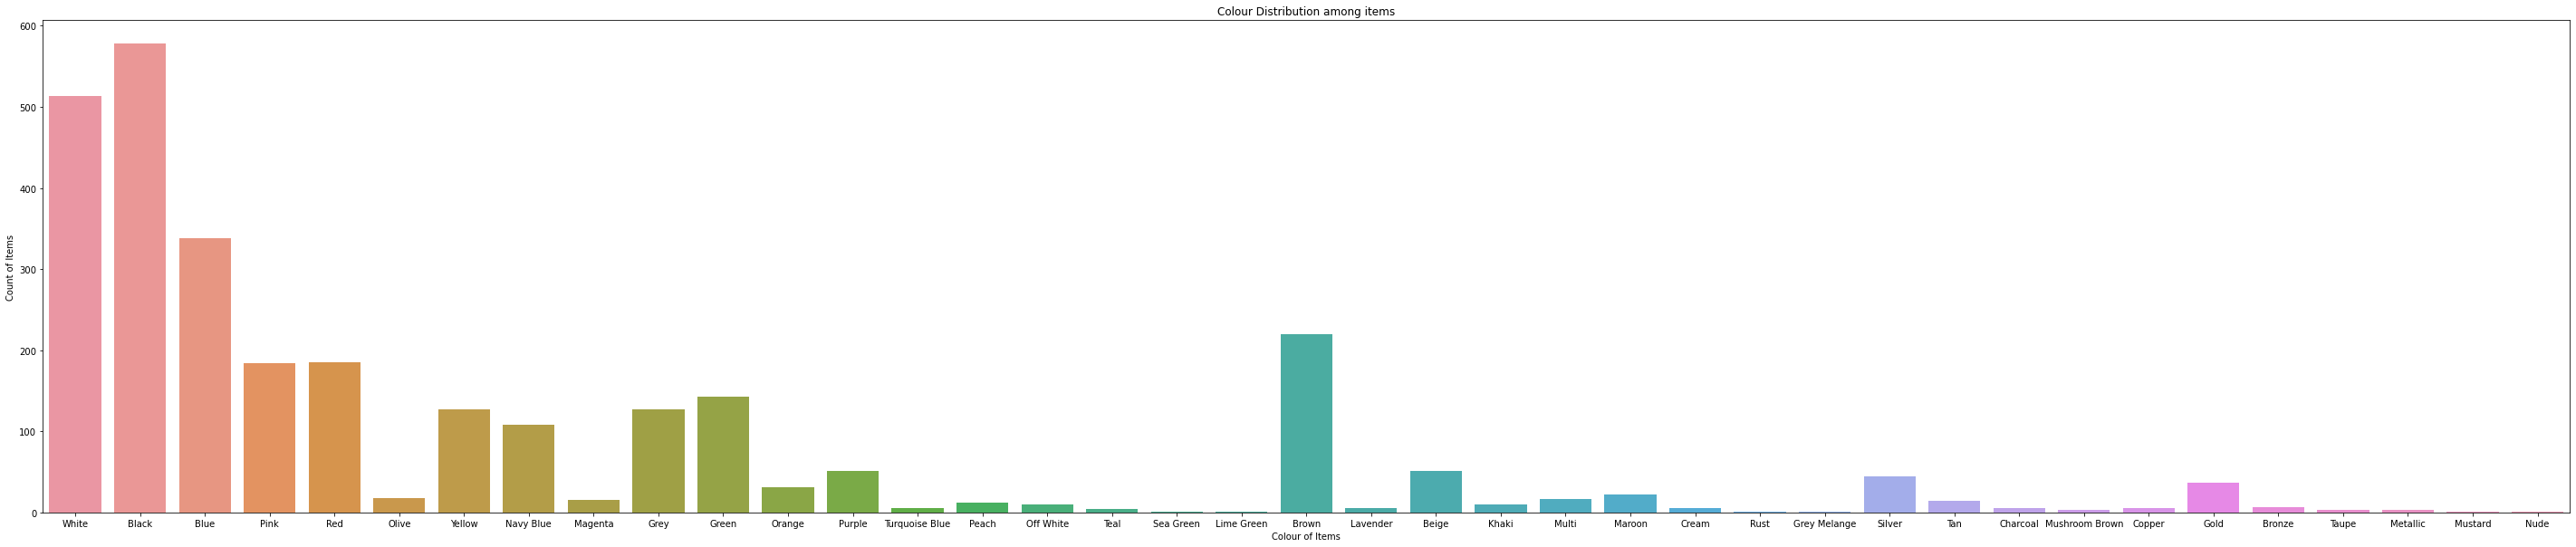

In [9]:
plt.figure(figsize=(50,10))
plot = sns.countplot(fashion_data["Colour"])
plt.title("Colour Distribution among items")
plt.xlabel("Colour of Items")
plt.ylabel("Count of Items")
#plot.set_xticklabels(plot.get_xticklabels())

C:\Users\CON3ADOLEA\.conda\envs\colour_recommendation\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



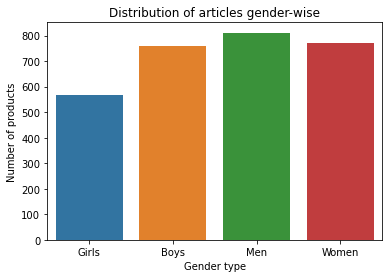

In [10]:
plot = sns.countplot(fashion_data["Gender"])
plt.title("Distribution of articles gender-wise")
plt.xlabel("Gender type")
plt.ylabel("Number of products")
plot.set_xticklabels(plot.get_xticklabels())
plt.show()

In [11]:
apparel_boys = fashion_data[fashion_data["Gender"]=="Boys"]
apparel_girls = fashion_data[fashion_data["Gender"]=="Girls"]
footwear_men = fashion_data[fashion_data["Gender"]=="Men"]
footwear_women = fashion_data[fashion_data["Gender"]=="Women"]

In [12]:
img_width, img_height = 224, 224

top_model_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
train_data_dir = "./data/Footwear/Men/Images/"

nb_train_samples = 811
epochs = 50
batch_size = 1

def extract_features():
    Itemcodes = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    model = applications.ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    for i in generator.filenames:
        Itemcodes.append(i[(i.find("/")+1):i.find(".")])
    extracted_features = model.predict_generator(generator,steps=nb_train_samples//batch_size)
    extracted_features = extracted_features.reshape((811,2048))#100352
    
    np.save(open('./Men_ResNet_features.npy', 'wb'), extracted_features)
    np.save(open('./Men_ResNet_feature_product_ids.npy', 'wb'), np.array(Itemcodes))

a = datetime.now()
extract_features()
print("Time taken in feature extraction", datetime.now()-a)

ERROR! Session/line number was not unique in database. History logging moved to new session 85
Found 811 images belonging to 1 classes.
Time taken in feature extraction 0:02:50.043513


In [13]:
extracted_features = np.load('Men_ResNet_features.npy')
Productids = np.load('Men_ResNet_feature_product_ids.npy')
men = footwear_men.copy()
#men = pd.read_csv('./footwear_men.csv')
df_Productids = list(men['ProductId'])
Productids = list(Productids)

In [54]:
#df_Productids
Productids[0]

'images_with_product_ids\\10037'

ERROR! Session/line number was not unique in database. History logging moved to new session 104


In [53]:
#for a in Productids:
    #print(int(''.join(filter(str.isdigit,a))))
#    dow=int(''.join(filter(str.isdigit,a)))

ERROR! Session/line number was not unique in database. History logging moved to new session 103


In [55]:
def get_similar_products_cnn(product_id, num_results):
    doc_id = Productids.index(product_id)
    pairwise_dist = pairwise_distances(extracted_features, extracted_features[doc_id].reshape(1,-1))
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    print("="*20, "input product image", "="*20)
    ip_row = men[['ImageURL','ProductTitle']].loc[men['ProductId']==int(Productids[indices[0]])]
    #print(ip_row.head())
    for indx, row in ip_row.iterrows():
        display(Image(url=row['ImageURL'], width = 224, height = 224,embed=True))
        print('Product Title: ', row['ProductTitle'])
    print("\n","="*20, "Recommended products", "="*20)
    for i in range(1,len(indices)):
        rows = men[['ImageURL','ProductTitle']].loc[men['ProductId']==int(Productids[indices[i]])]
        for indx, row in rows.iterrows():
            display(Image(url=row['ImageURL'], width = 224, height = 224,embed=True))
            print('Product Title: ', row['ProductTitle'])
            print('Euclidean Distance from input image:', pdists[i])

#get_similar_products_cnn('13683', 5)

In [57]:
get_similar_products_cnn(, 5)

SyntaxError: invalid syntax (<ipython-input-57-ab77c11e19e1>, line 1)

ERROR! Session/line number was not unique in database. History logging moved to new session 106


In [ ]:
def get_similar_products_cnn(product_id, num_results):
    for a in Productids:
        doc_id = [int(''.join(filter(str.isdigit,a)))]
        #doc_id = Productids.index(product_id)
        pairwise_dist = pairwise_distances(extracted_features, extracted_features[doc_id].reshape(1,-1))
        indices = np.argsort(pairwise_dist.flatten())[0:num_results]
        pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
        print("="*20, "input product image", "="*20)
        ip_row = men[['ImageURL','ProductTitle']].loc[men['ProductId']==int(Productids[indices[0]])]#print(ip_row.head())
        for indx, row in ip_row.iterrows():
            display(Image(url=row['ImageURL'], width = 224, height = 224,embed=True))
            print('Product Title: ', row['ProductTitle'])
        print("\n","="*20, "Recommended products", "="*20)
        for i in range(1,len(indices)):
            rows = men[['ImageURL','ProductTitle']].loc[men['ProductId']==int(Productids[indices[i]])]
            for indx, row in rows.iterrows():
                display(Image(url=row['ImageURL'], width = 224, height = 224,embed=True))
                print('Product Title: ', row['ProductTitle'])
                print('Euclidean Distance from input image:', pdists[i])

get_similar_products_cnn('13683', 5)